In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('support-vector-machine-for-gender-recognision')
jovian.set_colab_id('1Zz5Rr8e8eOU_Zasa2MJV2p7fBs_BJB2s')

# **Gender Recognision using Support Vector Machine with Scikit Learn - Machine Learning**


Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.

The ojective of SVM is to find a hyperplane in an N-Dimensional space to distinctly classify any datapoint.

This algorithm is commonly used when processing data with high dimensions

It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

## Problem Statement

Here, we will process 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz. Using this data, we will train our model to recognize the label of speech as Male or Female using SVM.


In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="support-vector-machine-for-gender-recognision")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/gouravitandel1945/support-vector-machine-for-gender-recognision


'https://jovian.ai/gouravitandel1945/support-vector-machine-for-gender-recognision'

## Downloading the Data

In this section, we will download the data using `opendatasets` library

`opendatasets` is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.


In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url='https://www.kaggle.com/datasets/primaryobjects/voicegender?select=voice.csv'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gouravitandel
Your Kaggle Key: ··········


100%|██████████| 405k/405k [00:00<00:00, 58.4MB/s]

In [ ]:
import os

Now, we will pass the path of the directory where the .csv file is downloaded.

In [ ]:
data_dir="./voicegender"

In [ ]:
voice_csv=data_dir+'/voice.csv'

In [ ]:
!pip install pandas --quiet

Now, we will convert the .csv file data to dataFrame using `pandas`

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(voice_csv)

In [ ]:
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


## Exploratory Data Analysis and Visualization

Here, we will try to analyise the columns from the dataset and try to dervive its relation with the target column.


In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [ ]:
px.histogram(df,x='modindx',y='centroid',color='label', title='Modulation Idex vs Centroid')

From the above diagram, we can see that maximum female voice lies in the range of 0.07 to 0.2 for Modulation Index.


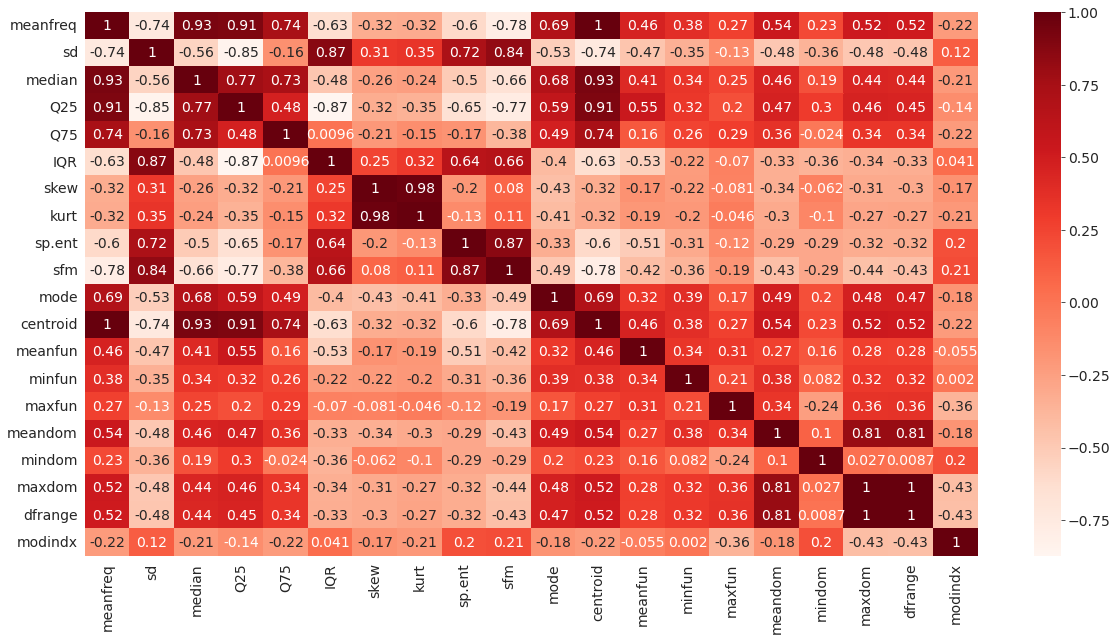

In [ ]:
plt.figure(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr,annot=True, cmap=plt.cm.Reds)
plt.show()

From the above chart , we can see that Centroid, Median and standard Deviation has maximum correlation with other columns.

In [ ]:
df.head(4)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male


In [ ]:
px.scatter(df, x='meanfreq',y='sd', color='label', title='Mean VS Sandard Deviation')

From the above chart, we can see that the labels are clearly divided into 2 groups. Females having standard deviaition in the range of 0.02 to 0.06 and Male in the range of 0.05 to 0.08

In [ ]:
px.scatter(df, x='Q25',y='Q75', color='label',size='IQR', title = "Q25 VS Q75")

from the above chart, we can see that 

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

Training set - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.

Validation set - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. Learn more here.

Test set - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.

<img src="https://i.imgur.com/j8eITrK.png" width="480">

When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the train_test_split utility from scikit-learn. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
!pip install scikit-learn --upgarde --quiet


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgarde


we will use the `train_test_split` library to split the data in desired sections

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df=train_test_split(df, test_size=0.2, random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (1900, 21)
val_df.shape : (634, 21)
test_df.shape : (634, 21)


## Identifying Input and Target Columns

Here, we will identify the target column from the entire dataset provided and create name dataframes that will contain the input columns and target data columns.

In [ ]:
input_columns=list(df.columns[1:-1])

In [ ]:
input_columns

['sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

In [ ]:
target_column='label'

We will create new dataframes with input columns and target columns for training data, Validation data and test data.

In [ ]:
train_inputs=train_df[input_columns].copy()
train_target=train_df[target_column].copy()

In [ ]:
val_inputs=val_df[input_columns].copy()
val_target=val_df[target_column].copy()

In [ ]:
test_inputs=test_df[input_columns].copy()
test_target=test_df[target_column].copy()

Now, we will check for the columns having non numeric data to convert it into numeric values.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Here all the columns are numeric so we can exclude the process of One hot encoding.

We will check the data for any null values in the data to handle it because training the data.


In [ ]:
df[input_columns].isna().sum()

sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
dtype: int64

here, there are not null values in the data.

## Scaling Numeric Features

Here, we will scale numeric features to ensure that no particular feature has a disproportionate impact on the model's loss. 

We will convert the data in the range of (0,1)

We will use `MinMaxScaler` library to scale the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(df[input_columns])

MinMaxScaler()

In [ ]:
train_inputs[input_columns] = scaler.transform(train_inputs[input_columns])
val_inputs[input_columns] = scaler.transform(val_inputs[input_columns])
test_inputs[input_columns] = scaler.transform(test_inputs[input_columns])

Let's check the data now.

In [ ]:
train_inputs.describe()

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,0.399350,0.699105,0.568013,0.787936,0.292135,0.087463,0.027113,0.643453,0.460986,0.592722,0.668622,0.481232,0.137826,0.884451,0.278416,0.108357,0.230861,0.228907,0.184631
std,0.172709,0.143455,0.196078,0.101799,0.180724,0.124568,0.104068,0.185784,0.219664,0.273386,0.139804,0.175857,0.099308,0.169067,0.178424,0.140232,0.162890,0.162987,0.124436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.004143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000648,0.052646,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241249,0.638117,0.454385,0.719155,0.117295,0.042877,0.002656,0.505366,0.272424,0.430466,0.590250,0.338837,0.042841,0.845813,0.139101,0.006452,0.094353,0.093884,0.106763
50%,0.420459,0.717324,0.568302,0.792710,0.327156,0.059322,0.004716,0.671551,0.450936,0.670773,0.685347,0.476516,0.177109,0.954963,0.257392,0.040860,0.226054,0.225322,0.147999
75%,0.498953,0.798033,0.711575,0.868838,0.418208,0.080709,0.008919,0.785371,0.618213,0.790492,0.754092,0.627225,0.196231,0.990585,0.395836,0.161290,0.320229,0.320100,0.223997
max,1.000000,0.997267,0.968082,0.984307,1.000000,0.927059,0.861513,0.985556,1.000000,1.000000,0.992977,1.000000,1.000000,1.000000,1.000000,0.978495,0.998928,0.998927,0.919979


We can see that all the data from numeric columns has been scaled in the range of (0,1)

Since no categorical column, One Hot Encoding is not needed

## Training an SVM Model

We will use the `SVC` library to train the SVM model.

Here, we will train the model with kernel Variation as linear and C = 1

A kernel is a function used in SVM for helping to solve problems. They provide shortcuts to avoid complex calculations. 

C is a hypermeter which is set before the training model and used to control error.




In [ ]:
from sklearn.svm import SVC
model=SVC(C=1,kernel='linear')

Now, we will fit the data in the above model created.

In [ ]:
%%time
model.fit(train_inputs, train_target)

CPU times: user 29 ms, sys: 938 µs, total: 30 ms
Wall time: 31.2 ms


SVC(C=1, kernel='linear')

Now, we will check the accuracy score of the above fitted data using `model.score()`

In [ ]:
model.score(val_inputs,val_target)

0.9605678233438486

The Validation dataset shows an accuracy of 96%. We will now test the above model with training dataset.

Now, we will check the accuracy score for test dataset.

In [ ]:
model.score(test_inputs,test_target)

0.9810725552050473

The testing data predictions

Here, the accuracy of test dataaset is 98.1%. Since the accuracy is already is 98%, we can stop at this point avoid the process of Hypertuning the parameters.




In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/gouravitandel1945/support-vector-machine-for-gender-recognision


'https://jovian.ai/gouravitandel1945/support-vector-machine-for-gender-recognision'